<a href="https://colab.research.google.com/github/HodaMemar/A3/blob/main/Create_Datase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DataSet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

#Preprocess

In [5]:
df_text=pd.read_csv('/content/drive/MyDrive/PaperA3/TFIDF/TFIDF_G02.csv')
df_diagnosis=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Final_L1.csv')

In [14]:
df_text

,Unnamed: 0,comment_text,target_list
0,0,Mucous body substance Twice a day clarithromyc...,"[True, False, False, True, False, False, False..."
1,1,Machine Done (qualifier value) Bromdimethoxyam...,"[False, False, False, True, False, False, Fals..."
2,2,Structure of right renal artery Chemical injur...,"[False, False, False, False, False, False, Fal..."
3,3,Calculus of gallbladder with cholecystitis Hep...,"[True, False, False, False, False, False, Fals..."
4,4,Aplastic Three Vessel Coronary Disease Scheuer...,"[False, False, False, False, False, False, Fal..."
...,...,...,...
26133,26133,NaN,"[False, False, True, False, False, False, Fals..."
26134,26134,NaN,"[False, False, False, False, False, False, Tru..."
26135,26135,NaN,"[False, False, False, False, False, False, Fal..."
26136,26136,NaN,"[False, False, False, False, True, False, Fals..."


In [6]:
print(df_text.shape)
print(df_diagnosis.shape)

(26138, 3)
(52307, 21)


In [7]:
df_text.head()

,Unnamed: 0,comment_text,target_list
0,0,Mucous body substance Twice a day clarithromyc...,"[True, False, False, True, False, False, False..."
1,1,Machine Done (qualifier value) Bromdimethoxyam...,"[False, False, False, True, False, False, Fals..."
2,2,Structure of right renal artery Chemical injur...,"[False, False, False, False, False, False, Fal..."
3,3,Calculus of gallbladder with cholecystitis Hep...,"[True, False, False, False, False, False, Fals..."
4,4,Aplastic Three Vessel Coronary Disease Scheuer...,"[False, False, False, False, False, False, Fal..."


In [9]:
dd=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Dictionary.csv')

In [10]:
dd=dd.set_index('first_cuid')
cui_dictionary= dict(zip(dd.index, dd.canonical_name))



In [11]:
import ast
def complex_function( ini_list):

    res = ast.literal_eval(ini_list)
    tms_text=''
    try:
      for i in res:
        
        if(i.upper().startswith("NOT")):
          tms_text=tms_text +'NOT '+cui_dictionary[i[4:].upper()] +' '
        else:
          tms_text=tms_text +cui_dictionary[i.upper()] +' '  
    except :
          print(i)    
    return tms_text 

In [12]:
cui_dictionary['C0026727']

'Mucous body substance'

In [13]:
df_text['Text'] = df_text.apply(lambda x: complex_function(x['list_CUIs']), axis=1)
df_text.head()


KeyError: ignored

In [ ]:
df_total = pd.merge(df_text, df_diagnosis, on=["HADM_ID"],how="left")
print(df_total.shape)
df_total.head()

(26138, 26)


,Unnamed: 0_x,HADM_ID,TFIDF,list_CUIs,number_CUIs,Text,Unnamed: 0_y,L1,L_10.0,L_8.0,...,L_1.0,L_14.0,L_3.0,L_9.0,L_17.0,L_15.0,L_13.0,L_16.0,L_7.0,L_12.0
0,0,157267.0,"c0026727,c0585361,c0055856,c0001314,c0151594,c...","['c0026727', 'c0585361', 'c0055856', 'c0001314...",57,Mucous body substance Twice a day clarithromyc...,29918.0,13.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,123103.0,"c0336779,c1272695,c0301362,c0024129,c0201950,c...","['c0336779', 'c1272695', 'c0301362', 'c0024129...",28,Machine Done (qualifier value) Bromdimethoxyam...,12144.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,139931.0,"c0226332,c0441713,c0232488,c0226333,c0042512,c...","['c0226332', 'c0441713', 'c0232488', 'c0226333...",42,Structure of right renal artery Chemical injur...,20902.0,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,198295.0,"c0267853,c3275700,c0239981,c3203358,c0162510,c...","['c0267853', 'c3275700', 'c0239981', 'c3203358...",52,Calculus of gallbladder with cholecystitis Hep...,51440.0,25.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,177962.0,"c0334079,c3272265,c0036310,c0014876,c0392689,c...","['c0334079', 'c3272265', 'c0036310', 'c0014876...",39,Aplastic Three Vessel Coronary Disease Scheuer...,40804.0,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_total.columns


Index(['Unnamed: 0_x', 'HADM_ID', 'TFIDF', 'list_CUIs', 'number_CUIs', 'Text',
       'Unnamed: 0_y', 'L1', 'L_10.0', 'L_8.0', 'L_6.0', 'L_4.0', 'L_11.0',
       'L_5.0', 'L_2.0', 'L_18.0', 'L_1.0', 'L_14.0', 'L_3.0', 'L_9.0',
       'L_17.0', 'L_15.0', 'L_13.0', 'L_16.0', 'L_7.0', 'L_12.0'],
      dtype='object')

In [ ]:
df_total.drop(['L1','Unnamed: 0_x',  'TFIDF', 'list_CUIs', 'number_CUIs','Unnamed: 0_y'], axis=1, inplace=True)
df_total.columns



Index(['HADM_ID', 'Text', 'L_10.0', 'L_8.0', 'L_6.0', 'L_4.0', 'L_11.0',
       'L_5.0', 'L_2.0', 'L_18.0', 'L_1.0', 'L_14.0', 'L_3.0', 'L_9.0',
       'L_17.0', 'L_15.0', 'L_13.0', 'L_16.0', 'L_7.0', 'L_12.0'],
      dtype='object')

In [ ]:

df_raw=df_total
df_raw = df_raw.rename(columns={'Text': 'comment_text'})

In [ ]:
df_raw.shape

(26138, 20)

In [ ]:
def bool(value):    
  if(value==1):
          tms_text=True
  else:
          tms_text=False    
  return tms_text 


df_raw['L_6.0'] = df_raw.apply(lambda x: bool(x['L_6.0']), axis=1)  

In [ ]:
df_raw['L_1.0'] = df_raw.apply(lambda x: bool(x['L_1.0']), axis=1)  
df_raw['L_2.0'] = df_raw.apply(lambda x: bool(x['L_2.0']), axis=1)  
df_raw['L_3.0'] = df_raw.apply(lambda x: bool(x['L_3.0']), axis=1)  
df_raw['L_4.0'] = df_raw.apply(lambda x: bool(x['L_4.0']), axis=1) 
df_raw['L_5.0'] = df_raw.apply(lambda x: bool(x['L_5.0']), axis=1)  
df_raw['L_6.0'] = df_raw.apply(lambda x: bool(x['L_6.0']), axis=1)  
df_raw['L_7.0'] = df_raw.apply(lambda x: bool(x['L_7.0']), axis=1)  
df_raw['L_8.0'] = df_raw.apply(lambda x: bool(x['L_8.0']), axis=1)  
df_raw['L_9.0'] = df_raw.apply(lambda x: bool(x['L_9.0']), axis=1) 
df_raw['L_10.0'] = df_raw.apply(lambda x: bool(x['L_10.0']), axis=1)  
df_raw['L_11.0'] = df_raw.apply(lambda x: bool(x['L_11.0']), axis=1)  
df_raw['L_12.0'] = df_raw.apply(lambda x: bool(x['L_12.0']), axis=1)  
df_raw['L_13.0'] = df_raw.apply(lambda x: bool(x['L_13.0']), axis=1)  
df_raw['L_14.0'] = df_raw.apply(lambda x: bool(x['L_14.0']), axis=1) 
df_raw['L_15.0'] = df_raw.apply(lambda x: bool(x['L_15.0']), axis=1)  
df_raw['L_16.0'] = df_raw.apply(lambda x: bool(x['L_16.0']), axis=1)  
df_raw['L_17.0'] = df_raw.apply(lambda x: bool(x['L_17.0']), axis=1)  
df_raw['L_18.0'] = df_raw.apply(lambda x: bool(x['L_18.0']), axis=1)  


In [ ]:
df_raw.head()

,HADM_ID,comment_text,L_10.0,L_8.0,L_6.0,L_4.0,L_11.0,L_5.0,L_2.0,L_18.0,L_1.0,L_14.0,L_3.0,L_9.0,L_17.0,L_15.0,L_13.0,L_16.0,L_7.0,L_12.0
0,157267.0,Mucous body substance Twice a day clarithromyc...,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,123103.0,Machine Done (qualifier value) Bromdimethoxyam...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,139931.0,Structure of right renal artery Chemical injur...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,198295.0,Calculus of gallbladder with cholecystitis Hep...,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,177962.0,Aplastic Three Vessel Coronary Disease Scheuer...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_raw.to_csv('/content/drive/MyDrive/PaperA3/Multilabel/df_raw.csv')

In [ ]:
df_raw.columns

Index(['HADM_ID', 'comment_text', 'L_10.0', 'L_8.0', 'L_6.0', 'L_4.0',
       'L_11.0', 'L_5.0', 'L_2.0', 'L_18.0', 'L_1.0', 'L_14.0', 'L_3.0',
       'L_9.0', 'L_17.0', 'L_15.0', 'L_13.0', 'L_16.0', 'L_7.0', 'L_12.0'],
      dtype='object')

In [ ]:
df_raw['target_list'] = df_raw[[ 'L_10.0', 'L_8.0', 'L_6.0', 'L_4.0', 'L_11.0',
       'L_5.0', 'L_2.0', 'L_18.0', 'L_1.0', 'L_14.0', 'L_3.0', 'L_9.0',
       'L_17.0', 'L_15.0', 'L_13.0', 'L_16.0', 'L_7.0', 'L_12.0']].values.tolist()

In [ ]:
print(len(df_raw))
df_raw.dropna()
print(len(df_raw))

26138
26138


In [ ]:
df_raw.iloc[0].target_list     

[True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
df_raw['WORD_COUNT'] = df_raw['comment_text'].apply(lambda x: len(x.split()))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb442818f90>]],
      dtype=object)

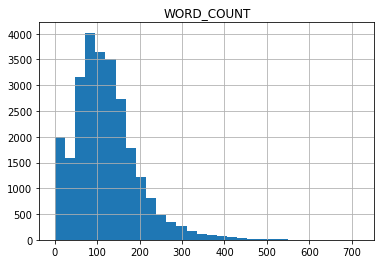

In [ ]:
df_raw.hist('WORD_COUNT', bins=30)

In [ ]:
df2 = df_raw[['comment_text', 'target_list']].copy()

df2.to_csv('/content/drive/MyDrive/PaperA3/Multilabel/PreBERT_TFIDF_G02.csv')

#MODEL

In [ ]:
df2=df2[:15000]





In [ ]:
for i in range(len(df2)):
 if(len((df2.iloc[i]['target_list']))<18):
  print(i)

In [ ]:
import gc


del cui_dictionary 
del df_raw 
del df_total 
del df_text 
del dd
gc.collect()

1482

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 50
TRAIN_BATCH_SIZE = 128
VALID_BATCH_SIZE = 128
EPOCHS = 2
LEARNING_RATE = 1e-07
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.title = dataframe['comment_text']
        self.targets = self.data.target_list
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_dataset = df2.sample(frac=train_size,random_state=200)
valid_dataset = df2.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(df2.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
validation_set = CustomDataset(valid_dataset, tokenizer, MAX_LEN)

FULL Dataset: (5000, 2)
TRAIN Dataset: (4000, 2)
TEST Dataset: (1000, 2)


,comment_text,target_list
0,"Mucous body substance , Twice a day , clarithr...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Machine , Done (qualifier value) , Bromdimetho...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,"Structure of right renal artery , Chemical inj...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"Calculus of gallbladder with cholecystitis , H...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,"Aplastic , Three Vessel Coronary Disease , Sch...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
4995,"Tracheal Sarcoma , Tracheal Neoplasms , liposa...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
4996,"Arm Pain , NOTCH2 protein, human , Ventricular...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4997,"Extracranial , promethazine , Structure of lef...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4998,"Malaria, Falciparum , Anterior descending bran...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
validation_loader = DataLoader(validation_set, **test_params)

In [ ]:
len(training_loader)

32

In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased',return_dict=False)
        self.l2 = torch.nn.Dropout(0.5)
        self.l3 = torch.nn.Linear(768, 18)
    
    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
len(training_loader)

32

In [ ]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

In [ ]:
import shutil, sys   
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [ ]:
#to use as global variables
val_targets=[]
val_outputs=[] 

In [ ]:
def train_model(start_epochs,  n_epochs, valid_loss_min_input, 
                training_loader, validation_loader, model, 
                optimizer, checkpoint_path, best_model_path):
   
  # initialize tracker for minimum validation loss
  valid_loss_min = valid_loss_min_input 
   
 
  for epoch in range(start_epochs, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)
    
    print('############# Epoch {}: Training End     #############'.format(epoch))
    
    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################    
    # validate the model #
    ######################
 
    model.eval()
   
    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics 
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
      
      # create checkpoint variable and add important data
      checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
      }
        
        # save checkpoint
      save_ckp(checkpoint, False, checkpoint_path, best_model_path)
        
      ## TODO: save the model if validation loss has decreased
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        # save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss

    print('############# Epoch {}  Done   #############\n'.format(epoch))


  return model

In [ ]:
checkpoint_path = '/content/sample_data/current_checkpoint.pt'
best_model = '/content/sample_data/best_model.pt'
trained_model = train_model(1, 2, np.Inf, training_loader, validation_loader, model, 
                      optimizer,checkpoint_path,best_model)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Avgerage Training Loss: nan 	Average Validation Loss: nan
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Avgerage Training Loss: nan 	Average Validation Loss: nan
############# Epoch 2  Done   #############



In [ ]:
val_preds = (np.array(val_outputs) > 0.5).astype(int)
val_preds

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
accuracy = metrics.accuracy_score(val_targets, val_preds)
f1_score_micro = metrics.f1_score(val_targets, val_preds, average='micro')
f1_score_macro = metrics.f1_score(val_targets, val_preds, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

ValueError: ignored

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix as mcm, classification_report

In [ ]:
cm_labels = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
    
cm = mcm(val_targets, val_preds)

In [ ]:
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.68      0.56      0.62       600
           1       0.00      0.00      0.00        54
           2       0.65      0.50      0.57       318
           3       0.00      0.00      0.00        24
           4       0.73      0.49      0.58       366
           5       0.00      0.00      0.00        72

   micro avg       0.69      0.47      0.56      1434
   macro avg       0.34      0.26      0.29      1434
weighted avg       0.62      0.47      0.53      1434
 samples avg       0.05      0.05      0.05      1434



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

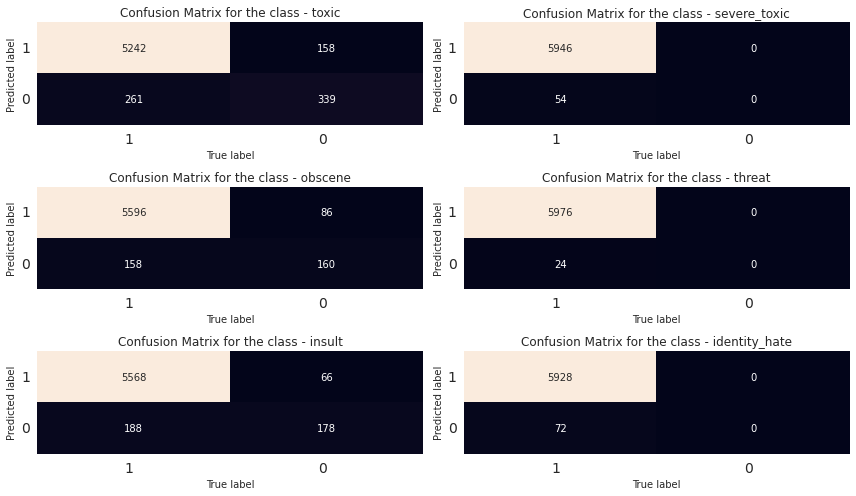

In [ ]:
#print_confusion_matrix(mcm(targets, val_preds),class_label=labels, class_names=labels)
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), cm, cm_labels):
  print_confusion_matrix(cfs_matrix, axes, label, ["1", "0"])
    
fig.tight_layout()
plt.show()